In [1]:
# Both join and merge can be used to combines two dataframes but the join method combines two dataframes on the basis of their indexes 
# whereas the merge method is more versatile and allows us to specify columns beside the index to join on for both dataframes

In [2]:
import pandas as pd

In [3]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", 'baltimore'],
    "temperature": [21,14,35,32],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,32


In [6]:
df2 = pd.DataFrame({
    "city": ["chicago","new york", 'san francisco'],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san francisco,71


In [7]:
# Often I want to join these two dataframes to create one single dataframe which contains both temperature and humidity
# You will use merge and put column which you want to merge on
pd.merge(df1,df2,on='city')

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [8]:
# Now have you ever wondered what will happen if you added an extra city in df1
# It'll only merge the cities with similar qualities
pd.merge(df1,df2,on='city')
# It basically did intersection here, Itnersection is basically taking common elements between the two sets
# There's also this concept of inner join or intersection
# What is set theory explain?
# Set theory is the mathematical theory of well-determined collections, called sets, of objects that are called members, or elements, of the set.

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [ ]:
# There are two types of joins , inner join and outer join

# Inner Join: Inner join is the most common type of join you’ll be working with. 
# It returns a dataframe with only those rows that have common characteristics. This is similar to the intersection of two sets.

# Full Outer Join: A full outer join returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with 
# NaNs elsewhere. But if the dataframe is complete, then we get the same output.

# Left Outer Join: With a left outer join, all the records from the first dataframe will be displayed, 
# irrespective of whether the keys in the first dataframe can be found in the second dataframe. Whereas, 
#for the second dataframe, only the records with the keys in the second dataframe that can be found in the first dataframe will be displayed.

# Right Outer Join: For a right join, all the records from the second dataframe will be displayed. 
# However, only the records with the keys in the first dataframe that can be found in the second dataframe will be displayed


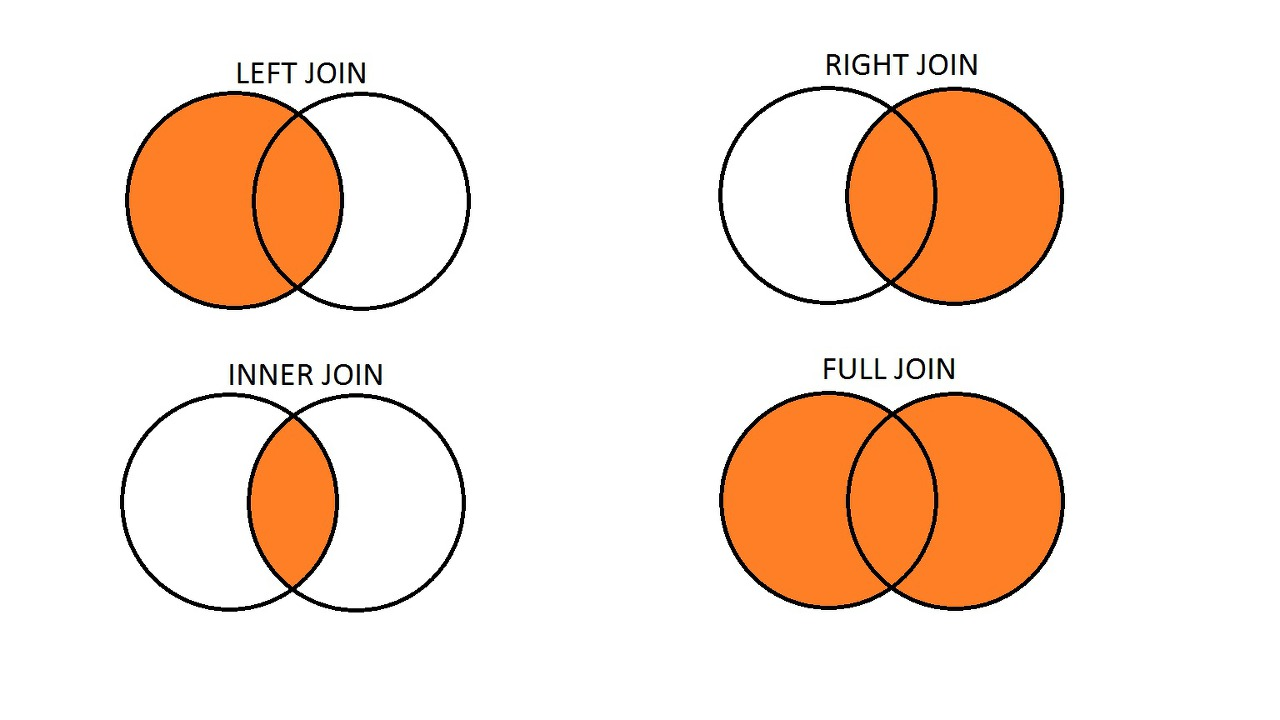

In [9]:
# The argument used for outer join is defiend from how='outer'
df3 = pd.merge(df1,df2, on='city', how='outer')
df3
# This is a bsically union of two datasets we had df1 and df2
# If there is no information it's gonna put NaN

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,32.0,NaN
4,san francisco,NaN,71.0


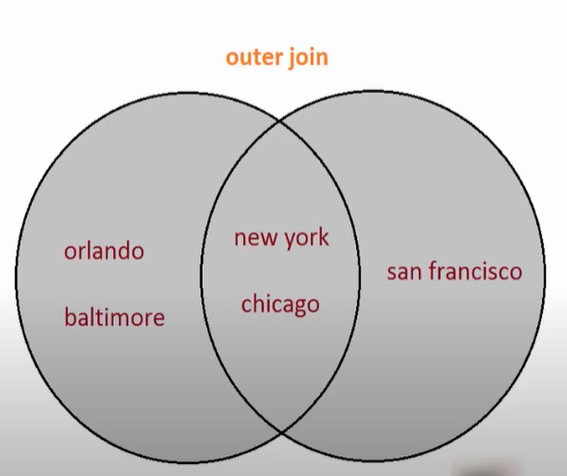

In [11]:
#Inner join is default, it is what you see when you don't supply "how"
df3 = pd.merge(df1,df2, on='city', how='inner')
df3

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


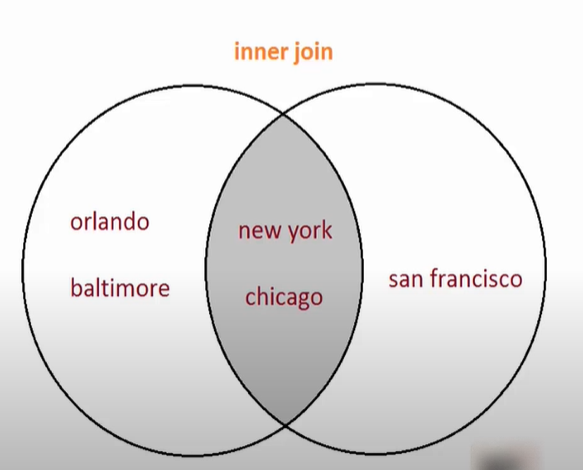

In [13]:
# Left inner join
df3 = pd.merge(df1,df2, on='city', how='left')
df3

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,32,NaN


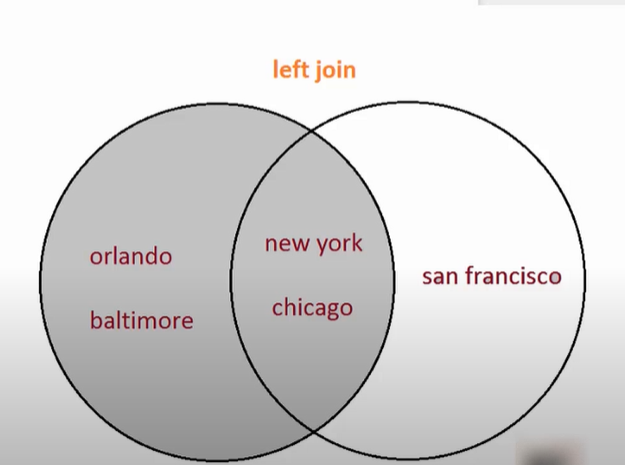

In [16]:
# Right inner join
df3 = pd.merge(df1,df2, on='city', how='right')
df3

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san francisco,NaN,71


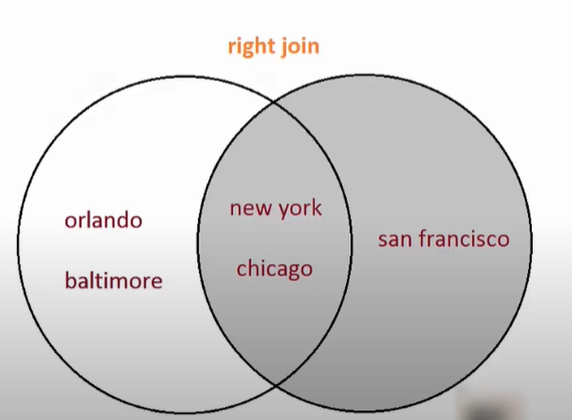

In [18]:
df3 = pd.merge(df1,df2, on='city', how='outer')
df3

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,32.0,NaN
4,san francisco,NaN,71.0


In [20]:
# Sometimes you want to know whether an element came from left or right
# In order to know that you can use indicator 
# Indicator by default is set to false if you set it to true, You'll get this additonal merge column where it'll tell you where it came from
df3 = pd.merge(df1,df2, on='city', how = 'outer',indicator = True)
df3



,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,32.0,NaN,left_only
4,san francisco,NaN,71.0,right_only


In [21]:
# We also have another useful argument called suffixes
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", 'baltimore'],
    "temperature": [21,14,35,38],
    'humidity': [65,68,71,75]
})
df1

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [22]:
df2 = pd.DataFrame({
    "city": ["chicago","new york", 'san diego'],
    'temperature': [21,14,35],
    "humidity": [65,68,71]
})
df2

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [23]:
# What you will notice is , it's gonna automatically append _x and _y because humidity column and temperature column are repeated between these two datasets
# so when it shows the results , it somehow has to distuniguish between these columns
df = pd.merge(df1,df2, on='city')
df

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,new york,21,65,14,68
1,chicago,14,68,21,65


In [24]:
# Now if you want your own suffixes you can define them
df = pd.merge(df1,df2, on='city', suffixes=('_left', "_right"))
df

,city,temperature_left,humidity_left,temperature_right,humidity_right
0,new york,21,65,14,68
1,chicago,14,68,21,65
